<h1> Toronto Bikeshare Ridership Summer of 2024 </h1>
<h3>by Eric S Lee</h3>
Toronto Bike Share Database for April to September of 2024

In [ ]:
# Required python package using Python 3.8.18 (Anaconda Virutal Environment)
# Include package required to run this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os

# from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

warnings.filterwarnings('ignore')

Import Bikeshare ridership csv data file for April 2024

In [2]:
# From, https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/
# From, zip file, select, Ridership in April 2024.

df_April = pd.read_csv('Ridership 2024-04.csv', encoding='latin-1')

print(df_April.info())
print(df_April.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403549 entries, 0 to 403548
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Trip Id             403549 non-null  int64 
 1   Trip  Duration      403549 non-null  int64 
 2   Start Station Id    403549 non-null  int64 
 3   Start Time          403549 non-null  object
 4   Start Station Name  402853 non-null  object
 5   End Station Id      403549 non-null  int64 
 6   End Time            403549 non-null  object
 7   End Station Name    402713 non-null  object
 8   Bike Id             403549 non-null  int64 
 9   User Type           403549 non-null  object
 10  Model               403549 non-null  object
dtypes: int64(5), object(6)
memory usage: 33.9+ MB
None
    Trip Id  Trip  Duration  Start Station Id        Start Time  \
0  27567494             307              7176  04/01/2024 00:00   
1  27567496             479              7169  04/01/2024 00:0

In [3]:
num_of_rows = len(df_April)
print(f"The number of rows in the dataset (April 2024) is {num_of_rows}")

The number of rows in the dataset (April 2024) is 403549


Import Bikeshare ridership csv data file for May 2024

In [4]:
# From, https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/
# From, zip file, select, Ridership in May 2024.

df_May = pd.read_csv('Ridership 2024-05.csv', encoding='latin-1')

print(df_May.info())
print(df_May.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685782 entries, 0 to 685781
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Trip Id             685782 non-null  int64 
 1   Trip  Duration      685782 non-null  int64 
 2   Start Station Id    685782 non-null  int64 
 3   Start Time          685782 non-null  object
 4   Start Station Name  685748 non-null  object
 5   End Station Id      685782 non-null  int64 
 6   End Time            685782 non-null  object
 7   End Station Name    685744 non-null  object
 8   Bike Id             685782 non-null  int64 
 9   User Type           685782 non-null  object
 10  Model               685782 non-null  object
dtypes: int64(5), object(6)
memory usage: 57.6+ MB
None
    Trip Id  Trip  Duration  Start Station Id        Start Time  \
0  28039944            2583              7633  05/01/2024 00:00   
1  28039945             666              7032  05/01/2024 00:0

In [5]:
num_of_rows = len(df_May)
print(f"The number of rows in the dataset (May 2024) is {num_of_rows}")

The number of rows in the dataset (May 2024) is 685782


Import Bikeshare ridership csv data file for June 2024

In [6]:
# From, https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/
# From, zip file, select, Ridership in June 2024.

df_Jun = pd.read_csv('Ridership 2024-06.csv', encoding='latin-1')

print(df_Jun.info())
print(df_Jun.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766068 entries, 0 to 766067
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Trip Id             766068 non-null  int64 
 1   Trip  Duration      766068 non-null  int64 
 2   Start Station Id    766068 non-null  int64 
 3   Start Time          766068 non-null  object
 4   Start Station Name  761588 non-null  object
 5   End Station Id      766068 non-null  int64 
 6   End Time            766068 non-null  object
 7   End Station Name    761569 non-null  object
 8   Bike Id             766068 non-null  int64 
 9   User Type           766068 non-null  object
 10  Model               764132 non-null  object
dtypes: int64(5), object(6)
memory usage: 64.3+ MB
None
    Trip Id  Trip  Duration  Start Station Id        Start Time  \
0  28829880             683              7109  06/01/2024 00:00   
1  28829881            1872              7526  06/01/2024 00:0

In [7]:
num_of_rows = len(df_Jun)
print(f"The number of rows in the dataset (June 2024) is {num_of_rows}")

The number of rows in the dataset (June 2024) is 766068


Import Bikeshare ridership csv data file for July 2024

In [8]:
# From, https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/
# From, zip file, select, Ridership in July 2024.

df_Jul = pd.read_csv("Ridership 2024-07.csv", encoding='latin-1')

print(df_Jul.info())
print(df_Jul.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903387 entries, 0 to 903386
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Trip Id             903387 non-null  int64 
 1   Trip  Duration      903387 non-null  int64 
 2   Start Station Id    903387 non-null  int64 
 3   Start Time          903387 non-null  object
 4   Start Station Name  882724 non-null  object
 5   End Station Id      903387 non-null  int64 
 6   End Time            903387 non-null  object
 7   End Station Name    882170 non-null  object
 8   Bike Id             903387 non-null  int64 
 9   User Type           903387 non-null  object
 10  Model               900585 non-null  object
dtypes: int64(5), object(6)
memory usage: 75.8+ MB
None
    Trip Id  Trip  Duration  Start Station Id     Start Time  \
0  29706718             611              7199  7/1/2024 0:00   
1  29706719            3592              7242  7/1/2024 0:00   
2  2

In [9]:
num_of_rows = len(df_Jul)
print(f"The number of rows in the dataset (July 2024) is {num_of_rows}")

The number of rows in the dataset (July 2024) is 903387


Import Bikeshare ridership csv data file for August 2024

In [10]:
# From, https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/
# From, zip file, select, Ridership in August 2024.

df_Aug = pd.read_csv('Ridership 2024-08.csv')

print(df_Aug.info())
print(df_Aug.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904925 entries, 0 to 904924
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Trip Id             904925 non-null  int64 
 1   Trip  Duration      904925 non-null  int64 
 2   Start Station Id    904925 non-null  int64 
 3   Start Time          904925 non-null  object
 4   Start Station Name  876724 non-null  object
 5   End Station Id      904925 non-null  int64 
 6   End Time            904925 non-null  object
 7   End Station Name    876356 non-null  object
 8   Bike Id             904925 non-null  int64 
 9   User Type           904925 non-null  object
 10  Model               902542 non-null  object
dtypes: int64(5), object(6)
memory usage: 75.9+ MB
None
    Trip Id  Trip  Duration  Start Station Id        Start Time  \
0  30751094             135              7066  08/01/2024 00:00   
1  30751095             897              7660  08/01/2024 00:0

In [11]:
num_of_rows = len(df_Aug)
print(f"The number of rows in the dataset (August 2024) is {num_of_rows}")

The number of rows in the dataset (August 2024) is 904925


Import Bikeshare ridership csv data file for September 2024

In [12]:
# From, https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/
# From, zip file, select, Ridership in September 2024.

df_Sep = pd.read_csv('Ridership 2024-09.csv')

print(df_Sep.info())
print(df_Sep.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899615 entries, 0 to 899614
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Trip Id             899615 non-null  int64 
 1   Trip  Duration      899615 non-null  int64 
 2   Start Station Id    899615 non-null  int64 
 3   Start Time          899615 non-null  object
 4   Start Station Name  868970 non-null  object
 5   End Station Id      899615 non-null  int64 
 6   End Time            899615 non-null  object
 7   End Station Name    868192 non-null  object
 8   Bike Id             899615 non-null  int64 
 9   User Type           899615 non-null  object
 10  Model               896444 non-null  object
dtypes: int64(5), object(6)
memory usage: 75.5+ MB
None
    Trip Id  Trip  Duration  Start Station Id        Start Time  \
0  31797566             842              7933  09/01/2024 00:00   
1  31797567            2195              7075  09/01/2024 00:0

In [13]:
num_of_rows = len(df_Sep)
print(f"The number of rows in the dataset (September 2024) is {num_of_rows}")

The number of rows in the dataset (September 2024) is 899615


Combine all dataframes (April to  September) into one dataframe

In [14]:
# https://www.geeksforgeeks.org/how-to-combine-two-dataframe-in-python-pandas/

# Combined two DataFrames by stacking them vertically (row-wise) using concat().

# Note that, by default, pd.concat() will stack rows, so the DataFrames would be stacked on top of each other row by row, 
# resulting in each DataFrame’s rows being added to the end of the other so each keeping its own default index values unless you set ignore_index=True.

# Combine using concat()
df = pd.concat([df_April, df_May, df_Jun, df_Jul, df_Aug, df_Sep], ignore_index=True)
display(df)

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,Model
0,27567494,307,7176,04/01/2024 00:00,Bathurst St / Fort York Blvd,7720,04/01/2024 00:05,King St W / Portland St,4851,Casual Member,ICONIC
1,27567496,479,7169,04/01/2024 00:01,Front St W / Bay St (North Side),7542,04/01/2024 00:09,Queen St W / John St,3452,Casual Member,ICONIC
2,27567497,245,7660,04/01/2024 00:01,285 Victoria St,7333,04/01/2024 00:05,King St E / Victoria St,1158,Annual Member,ICONIC
3,27567504,212,7322,04/01/2024 00:03,King St W / Brant St,7523,04/01/2024 00:07,Lynn Williams St / East Liberty St - SMART,5592,Annual Member,ICONIC
4,27567505,624,7047,04/01/2024 00:04,University Ave / Gerrard St W (East Side),7208,04/01/2024 00:14,80 Clinton St (North of College),1099,Casual Member,ICONIC
...,...,...,...,...,...,...,...,...,...,...,...
4563321,32824170,1164,7017,09/30/2024 23:59,Widmer St / Adelaide St W - SMART,7693,10/01/2024 00:18,Mutual St / Shuter St (Arena Gardens),5090,Casual Member,ICONIC
4563322,32824171,1002,7713,09/30/2024 23:59,Temperance St / Bay St,7075,10/01/2024 00:16,Queens Quay W / Dan Leckie Way,6322,Casual Member,ICONIC
4563323,32824172,268,7168,09/30/2024 23:59,Queens Quay / Yonge St,7686,10/01/2024 00:04,Lower Jarvis St / The Esplanade,2928,Casual Member,ICONIC
4563324,32824174,241,7278,09/30/2024 23:59,Mallon Ave / Jones Ave -SMART,7705,10/01/2024 00:03,Colgate Ave / Carlaw Ave,1874,Casual Member,ICONIC


In [15]:
num_of_rows = len(df)
print(f"The number of rows in the dataset is {num_of_rows}")

The number of rows in the dataset is 4563326


Categorize by value counts based on the columns for each

In [16]:
# Print out all the columns for the dataset

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4563326 entries, 0 to 4563325
Data columns (total 11 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Trip Id             int64 
 1   Trip  Duration      int64 
 2   Start Station Id    int64 
 3   Start Time          object
 4   Start Station Name  object
 5   End Station Id      int64 
 6   End Time            object
 7   End Station Name    object
 8   Bike Id             int64 
 9   User Type           object
 10  Model               object
dtypes: int64(5), object(6)
memory usage: 383.0+ MB
None


In [17]:
# By trip duration

print(df['Trip  Duration'].value_counts())

Trip  Duration
449       4715
490       4640
471       4639
428       4634
420       4620
          ... 
252316       1
36613        1
11709        1
14578        1
11591        1
Name: count, Length: 17939, dtype: int64


In [18]:
# By name of the starting station

print(df['Start Station Name'].value_counts())

Start Station Name
York St / Queens Quay W                         36113
Bay St / College St (East Side)                 31884
Bay St / Queens Quay W (Ferry Terminal)         28181
Union Station                                   27781
Queens Quay / Yonge St                          26316
                                                ...  
Dufferin St / Finch Hydro Recreational Trail       38
Starspray Ave / Lawrence Ave E                     37
O'Connor Dr / Curity Ave - SMART                   20
Warehouse EBS-Station                               4
2 Church St                                         1
Name: count, Length: 904, dtype: int64


In [19]:
# By name of the ending station

print(df['End Station Name'].value_counts())

End Station Name
York St / Queens Quay W                         39521
King St W / Bay St (West Side)                  36504
Union Station                                   34136
Bay St / College St (East Side)                 31820
Bay St / Queens Quay W (Ferry Terminal)         29242
                                                ...  
Bike Shop Test Station                             31
Dufferin St / Finch Hydro Recreational Trail       30
O'Connor Dr / Curity Ave - SMART                   18
2 Church St                                         8
Warehouse EBS-Station                               8
Name: count, Length: 905, dtype: int64


In [20]:
# By start time (Full date and time)

print(df['Start Time'].value_counts())

Start Time
7/24/2024 17:53     153
09/17/2024 17:07    123
09/17/2024 17:57    105
08/27/2024 17:35    103
09/18/2024 17:10    102
                   ... 
04/20/2024 07:16      1
04/20/2024 07:17      1
04/20/2024 07:20      1
06/10/2024 06:02      1
04/01/2024 00:00      1
Name: count, Length: 248012, dtype: int64


In [21]:
# By end time (Full date and time)

print(df['End Time'].value_counts())

End Time
09/10/2024 08:55    97
7/23/2024 17:29     94
09/10/2024 18:27    94
09/17/2024 17:20    94
09/11/2024 18:03    94
                    ..
09/19/2024 04:38     1
06/20/2024 05:50     1
06/20/2024 05:56     1
06/20/2024 05:59     1
7/3/2024 5:39        1
Name: count, Length: 248497, dtype: int64


In [22]:
# Type of the membership of Bikeshare

print(df['User Type'].value_counts())

User Type
Casual Member    4099929
Annual Member     463397
Name: count, dtype: int64


In [23]:
# By model type of the bike

print(df['Model'].value_counts())

Model
ICONIC     3777665
EFIT G5     514358
EFIT        261011
Name: count, dtype: int64


# Data Cleaning Stage

Copy/Duplicate the dataset (Unnecessary Steps)

In [24]:
new_df = df.copy()

Convert 'Start Time' into datetime type.<br />
Then created new column called 'Start Hour' where it record the hour.

In [25]:
new_df['Start Time'] = pd.to_datetime(new_df['Start Time'])
new_df['Start Hour'] = new_df['Start Time'].dt.hour

In [26]:
# Start Hour will record the hour in integer to indicate what time of the day has started.

print(new_df['Start Hour'].value_counts())

Start Hour
17    486195
18    424626
16    368874
19    336200
15    285035
8     278749
20    254626
14    249271
13    237564
12    226355
9     198354
21    194139
11    193969
10    169811
22    149265
7     140485
23    115308
0      65939
6      64949
1      40252
2      31181
5      24160
3      16124
4      11895
Name: count, dtype: int64


Do same for 'End Time' and its new column called 'End Hour'.

In [27]:
new_df['End Time'] = pd.to_datetime(new_df['End Time'])
new_df['End Hour'] = new_df['End Time'].dt.hour

In [28]:
print(new_df['End Hour'].value_counts())

End Hour
17    468379
18    441628
19    357576
16    342481
20    276926
15    274629
8     255640
14    241698
13    233182
9     221342
12    217972
21    212855
11    182826
10    164747
22    161121
23    128387
7     118800
0      76767
6      55103
1      44770
2      33258
5      21294
3      19763
4      12182
Name: count, dtype: int64


After the process, these are the result,

In [29]:
print(new_df.info())

num_of_rows = len(new_df)
print(f"NEW: The number of rows is {num_of_rows}")

num_of_rows = len(new_df)
print(f"OLD: The number of rows is {num_of_rows}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4563326 entries, 0 to 4563325
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Trip Id             int64         
 1   Trip  Duration      int64         
 2   Start Station Id    int64         
 3   Start Time          datetime64[ns]
 4   Start Station Name  object        
 5   End Station Id      int64         
 6   End Time            datetime64[ns]
 7   End Station Name    object        
 8   Bike Id             int64         
 9   User Type           object        
 10  Model               object        
 11  Start Hour          int32         
 12  End Hour            int32         
dtypes: datetime64[ns](2), int32(2), int64(5), object(4)
memory usage: 417.8+ MB
None
NEW: The number of rows is 4563326
OLD: The number of rows is 4563326


Duplicate/Copy once more for next stage - Unnecessary Step<br />
Next step involves removing missing values and the duplicates.

In [30]:
new_df_2 = new_df.copy()

Removing the missing values from the dataset.

In [31]:
print(new_df_2.isnull().sum())

new_df_2.dropna(inplace = True)
# OR new_df_2 = new_df_2.dropna()

print(new_df_2.isnull().sum()) # OR df.isnull().sum()

Trip Id                   0
Trip  Duration            0
Start Station Id          0
Start Time                0
Start Station Name    84719
End Station Id            0
End Time                  0
End Station Name      86582
Bike Id                   0
User Type                 0
Model                 10292
Start Hour                0
End Hour                  0
dtype: int64
Trip Id               0
Trip  Duration        0
Start Station Id      0
Start Time            0
Start Station Name    0
End Station Id        0
End Time              0
End Station Name      0
Bike Id               0
User Type             0
Model                 0
Start Hour            0
End Hour              0
dtype: int64


Remove any duplicates from the dataset.
It should done in the missing values.

In [32]:
duplicate_rows = new_df_2.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


In [33]:
new_df_2.drop_duplicates(inplace = True)

In [34]:
duplicate_rows = new_df_2.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


Finally, after removing missing (and duplicated) values, the number of the row in the dataframe are following:

In [35]:
num_of_rows = len(new_df_2)
print(f"The number of rows is {num_of_rows}")

The number of rows is 4389436


Graph of the Trip Duration show that, some user used it for 0 to 1 seconds.

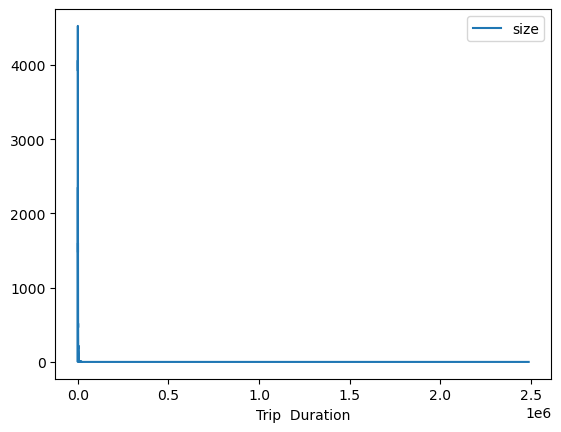

In [36]:
Trip_Duration_Grouped = new_df_2.groupby(['Trip  Duration'])

Trip_Duration_Plot = Trip_Duration_Grouped['Trip  Duration'].agg([np.size])

Trip_Duration_Plot.plot()

plt.show()

In [37]:
# Noticed, that there are users who only used for 0 to 2 seconds.
# Assuming that they only use it to pick up and drop off instantly.

print(Trip_Duration_Plot.head(5))

                size
Trip  Duration      
0               2339
2               1885
4                  1
5                  1
8                  1


Therefore remove users who only use for 0 to 2 seconds.

In [38]:
new_df_3 = new_df_2.loc[new_df_2['Trip  Duration'] > 3] 
print("After cleaning user with 0 to 2 seconds, there are")
print(len(new_df_3))
print("Originally from "+str(len(new_df_2)))

After cleaning user with 0 to 2 seconds, there are
4385212
Originally from 4389436


# Initial Analysis Stage

The first portion organized based on the duration of the each trip.

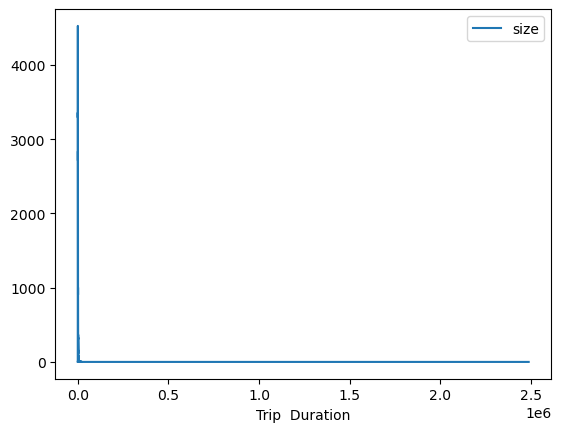

In [39]:
# Chart showing overall result.

Trip_Duration_Grouped = new_df_3.groupby(['Trip  Duration'])

Trip_Duration_Plot = Trip_Duration_Grouped['Trip  Duration'].agg([np.size])

Trip_Duration_Plot.plot()

plt.show()

Number of users who used less than 1 minutes (60 seconds)

In [40]:
Trip_Duration_Below_1_df = new_df_3.loc[new_df_3['Trip  Duration'] < 60] 
print(len(Trip_Duration_Below_1_df))  # 757

1928


Number of users who used between one to ten minutes.

1785103


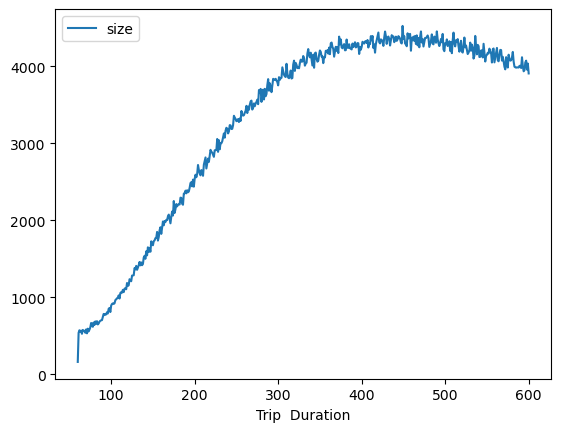

In [41]:
Trip_Duration_Below_10_df = new_df_3.loc[(new_df_3['Trip  Duration'] >= 60) & (new_df_3['Trip  Duration'] <= 600)] # Between one minutes (60) to ten minutes (600)
print(len(Trip_Duration_Below_10_df)) # 699030

Trip_Duration_Grouped = Trip_Duration_Below_10_df.groupby(['Trip  Duration'])

Trip_Duration_Plot = Trip_Duration_Grouped['Trip  Duration'].agg([np.size])

Trip_Duration_Plot.plot()

plt.show() # Peak

Number of users whose used bikeshare between 10 to 30 minutes.

2159993


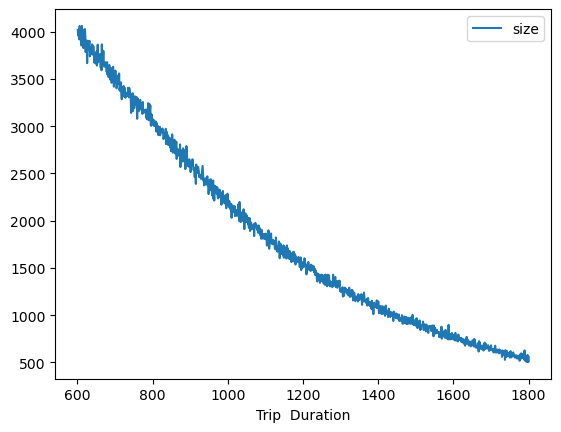

In [42]:
Trip_Duration_Below_30_df = new_df_3.loc[(new_df_3['Trip  Duration'] > 600) &
                                   (new_df_3['Trip  Duration'] <= 1800)] 
print(len(Trip_Duration_Below_30_df)) # 833628

Trip_Duration_Grouped = Trip_Duration_Below_30_df.groupby(['Trip  Duration'])

Trip_Duration_Plot = Trip_Duration_Grouped['Trip  Duration'].agg([np.size])

Trip_Duration_Plot.plot()

plt.show() # Decreasing

Number of users whose use bikeshare between 30 minutes to 45 minutes.

256109


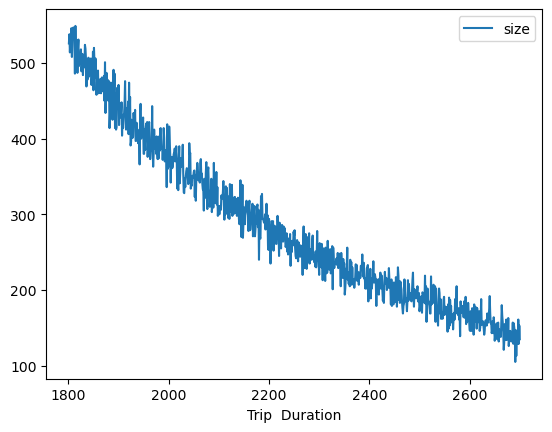

In [43]:
Trip_Duration_Below_45_df = new_df_3.loc[(new_df_3['Trip  Duration'] > 1800) &
                                   (new_df_3['Trip  Duration'] <= 2700)] 
print(len(Trip_Duration_Below_45_df)) # 90631

Trip_Duration_Grouped = Trip_Duration_Below_45_df.groupby(['Trip  Duration'])

Trip_Duration_Plot = Trip_Duration_Grouped['Trip  Duration'].agg([np.size])

Trip_Duration_Plot.plot()

plt.show() # Constantly decreasing

Number of users who use bikeshare between 45 minutes to 90 minutes.

138669


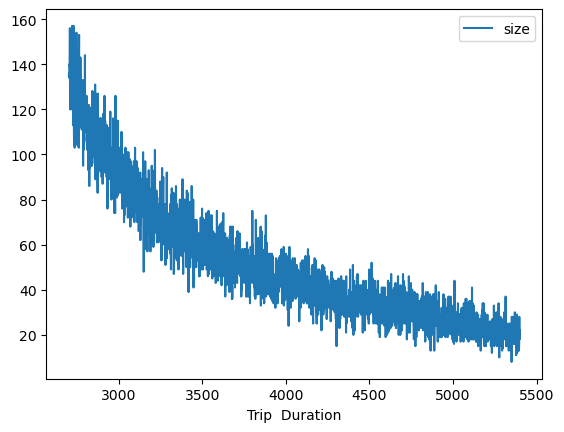

In [44]:
# Noticed that bikeshare do not usually allow to member to use more than 45 minutes.

Trip_Duration_Below_90_df = new_df_3.loc[(new_df_3['Trip  Duration'] > 2700) &
                                   (new_df_3['Trip  Duration'] <= 5400)] 
print(len(Trip_Duration_Below_90_df)) # 47213

Trip_Duration_Grouped = Trip_Duration_Below_90_df.groupby(['Trip  Duration'])

Trip_Duration_Plot = Trip_Duration_Grouped['Trip  Duration'].agg([np.size])

Trip_Duration_Plot.plot()

plt.show()

Number of users whose use more than 90.

20546


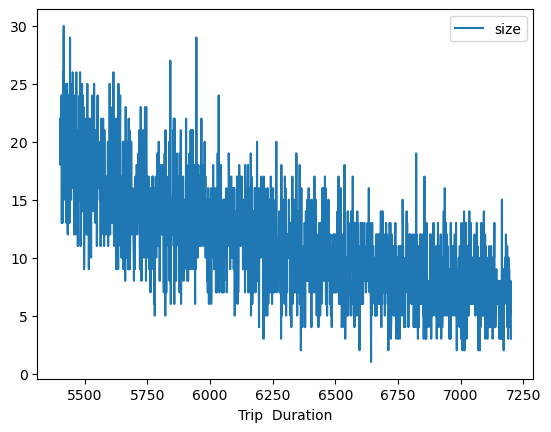

In [45]:
# More than 90 minutes but less than 120 minutes. (With graph)

Trip_Duration_Below_120_df = new_df_3.loc[(new_df_3['Trip  Duration'] > 5400) &
                                   (new_df_3['Trip  Duration'] <= 7200)] 
print(len(Trip_Duration_Below_120_df)) # 6824

Trip_Duration_Grouped = Trip_Duration_Below_120_df.groupby(['Trip  Duration'])

Trip_Duration_Plot = Trip_Duration_Grouped['Trip  Duration'].agg([np.size])

Trip_Duration_Plot.plot()

plt.show()

In [46]:
# Numbers of user who use more than 120 minutes.

Trip_Duration_Above_120_df = new_df_3.loc[new_df_3['Trip  Duration'] > 7200] 
print(len(Trip_Duration_Above_120_df)) # 7340

22864


Based on the overall result, the numbers of the peak users occurs between one minutes to 45 minutes period.

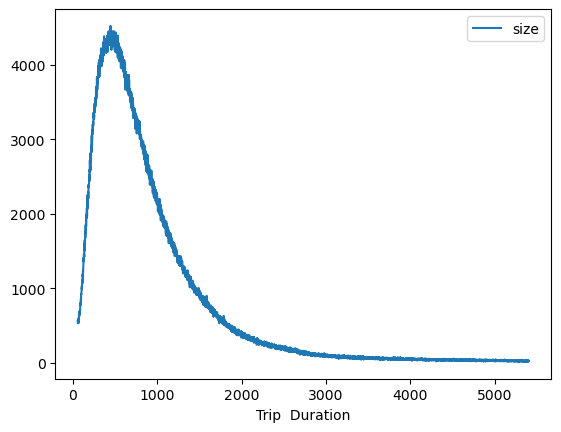

In [47]:
Trip_Duration_Overall_df = new_df_3.loc[(new_df_3['Trip  Duration'] > 60) &
                                   (new_df_3['Trip  Duration'] <= 5400)] 

Trip_Duration_Grouped = Trip_Duration_Overall_df.groupby(['Trip  Duration'])

Trip_Duration_Plot = Trip_Duration_Grouped['Trip  Duration'].agg([np.size])

Trip_Duration_Plot.plot()

plt.show() # Most usage occurred between 1 ~ 30 minutes.

The 'Start Hour' and 'End Hour' used to predict amount of user that use during specific time of the day.

Graph for hour of period who pick up the bike. 8am and 5pm are the peak hours to picking up the bike.

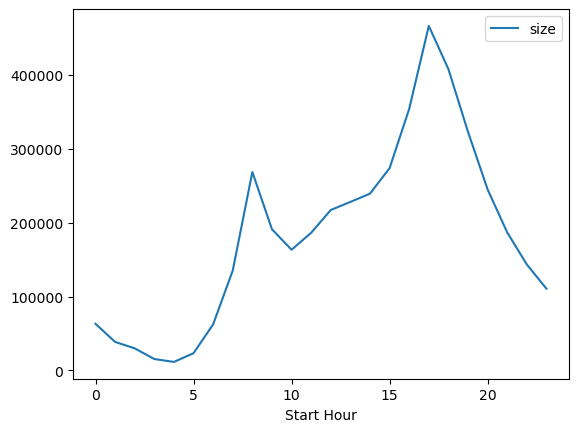

In [48]:
Start_Hour_Grouped = new_df_3.groupby(['Start Hour'])

Start_Hour_Plot = Start_Hour_Grouped['Start Hour'].agg([np.size])
# print(Start_Hour_Plot) # Hour start from 0 (12am) to 23 (11pm)

Start_Hour_Plot.plot()

plt.show()

Graph for hour of period who drop off the bike. 9am and 6 to 7pm are the peak hours to drop off the bike.

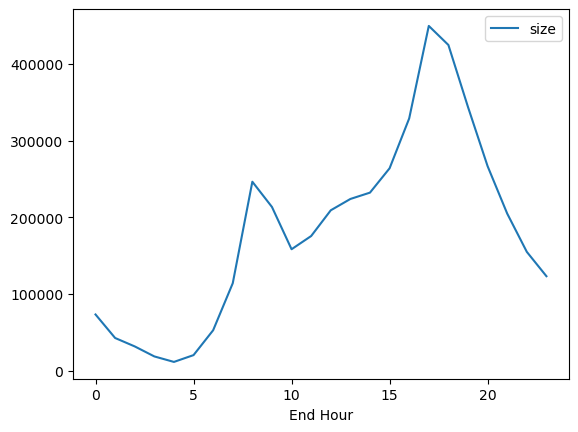

In [49]:
End_Hour_Grouped = new_df_3.groupby(['End Hour'])

End_Hour_Plot = End_Hour_Grouped['End Hour'].agg([np.size])
# print(End_Hour_Plot) # Hour start from 0 (12am) to 23 (11pm)

End_Hour_Plot.plot()

plt.show()

For most user bike share station, Downtown Bike Stations the most use station for pick up. Outside of Downtown are the least bike stations that are being used. 

In [50]:
Start_Station_Grouped = new_df_3.groupby(['Start Station Name'])

Start_Station_Plot = Start_Station_Grouped['Start Station Name'].size().sort_values(ascending=False)

In [51]:
print("Top 25 Bike Start Station")
print(Start_Station_Plot.head(25)) # Mostly Downtown

Top 25 Bike Start Station
Start Station Name
York St / Queens Quay W                    35167
Bay St / College St (East Side)            31401
Bay St / Queens Quay W (Ferry Terminal)    27594
Union Station                              26851
Queens Quay / Yonge St                     25708
Bay St / Wellesley St W                    25509
College St / Major St                      25176
Queen St W / John St                       23690
King St W / Portland St                    23647
College St / Markham St                    21681
Fort York  Blvd / Capreol Ct               21195
College St / Huron St                      20543
Dundas St W / Crawford St                  20245
Bathurst St / Front St W                   20137
College Park - Yonge St Entrance           20132
Richmond St E / Yonge St                   20063
Dundas St W / Yonge St                     19816
Baldwin St / Spadina Ave - SMART           19759
Widmer St / Adelaide St W - SMART          19460
St. George St / Bloor St

In [52]:
print("\nBottom 10 Bike Start Station")
print(Start_Station_Plot.tail(10)) # Mostly outside of Downtown


Bottom 10 Bike Start Station
Start Station Name
Priscilla  Ave / Dundas St W                    71
Bloor St W / Riverside Ave                      71
Lundy Ave / Etienne Brule Park                  53
Roehampton St / Bayview Ave                     48
Goodwood Park Ct / Dentonia Park                48
Dufferin St / Finch Hydro Recreational Trail    38
Starspray Ave / Lawrence Ave E                  37
O'Connor Dr / Curity Ave - SMART                20
Warehouse EBS-Station                            4
2 Church St                                      1
Name: Start Station Name, dtype: int64


For most user bike share station, Downtown Bike Stations the most use station for drop off as well. Aside from maintaince yard, outside of Downtown Bike Stations are the least use station for drop off as well.

In [53]:
End_Station_Grouped = new_df_3.groupby(['End Station Name'])

End_Station_Plot = End_Station_Grouped['End Station Name'].size().sort_values(ascending=False) # .agg([np.size])

In [54]:
print("Top 25 Bike End Station")
print(End_Station_Plot.head(25)) # Mostly Downtown

Top 25 Bike End Station
End Station Name
York St / Queens Quay W                          38498
King St W / Bay St (West Side)                   35748
Union Station                                    32899
Bay St / College St (East Side)                  31323
Bay St / Queens Quay W (Ferry Terminal)          28563
Queens Quay / Yonge St                           27013
College St / Major St                            25442
Queen St W / John St                             24412
King St W / Portland St                          24194
College St / Markham St                          21941
Dundas St W / Crawford St                        21899
University Ave / Gerrard St W (East Side)        21372
Dundas St W / Yonge St                           21162
Bathurst St/Queens Quay(Billy Bishop Airport)    21128
Fort York  Blvd / Capreol Ct                     20603
College St / Huron St                            20498
Bathurst St / Front St W                         20367
Richmond St E / Yonge St

In [55]:
print("\nBottom 10 Bike End Station")
print(End_Station_Plot.tail(10)) # Except for Warehouse, outside of Downtown


Bottom 10 Bike End Station
End Station Name
Lundy Ave / Etienne Brule Park                  59
Jane St / Lawrence Ave W                        55
Starspray Ave / Lawrence Ave E                  43
Roehampton St / Bayview Ave                     36
Goodwood Park Ct / Dentonia Park                30
Dufferin St / Finch Hydro Recreational Trail    30
O'Connor Dr / Curity Ave - SMART                18
2 Church St                                      8
Warehouse EBS-Station                            7
Bike Shop Test Station                           7
Name: End Station Name, dtype: int64


- K-Fold validation on the dataset given.

<h1>10 fold cross-validation with Training/Validation Set</h1>

- First do ten (k-fold) Cross-validation on the training(/validaiton)set<br />
- Second do the testing the models on the test set<br />
- For spliting Training and testing models, 99.94% of dataset will be using as training 0.05% validation and remaining 0.01% of dataset will beusing as test set.

In [56]:
# The data will do cross-validation and SVM will be done using Overall dataset generated in the previous steps.

new_df_5 = Trip_Duration_Overall_df.copy()

In [57]:
# X will be all the columns except for Trip Id, Trip Duration, name of Start/End Station, and date.
features = ['Start Station Id','End Station Id','Start Hour','End Hour']

X = new_df_5.loc[:, features]
y = new_df_5.loc[:, ['Trip  Duration']]

Spliting Train/Validation Set and Test Set

In [ ]:
# Split Train(/Validaiton) and Test Set

# Due to processing power, the data is divided into validation, training, and testing set instead.
# Both validation and testing set will be divided into 0.05% and 0.01% respectively.
# Original plan is to divide 70% of training and 30% of testing.

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, random_state=0, test_size = .0001)

X_val, X_train, y_val, y_train = train_test_split(X_train_temp, y_train_temp, random_state=0, train_size = .0005)

Do ten fold

In [60]:
# Step necessary to do cross-validation

k_folds = KFold(n_splits = 10)

Using the 10 fold cross validation with "Linear Regression"

In [ ]:
# Create linear regression model
linear_reg = linear_model.LinearRegression()

# Fit the model for Linear Regression
linear_reg.fit(X_val, y_val)

# Apply k Fold cross validation
linear_scores = cross_val_score(linear_reg, X_val, y_val, cv = k_folds)

print("Cross Validation Scores: ", linear_scores)
print("Average CV Score: ", linear_scores.mean())
print("Number of CV Scores used in Average: ", len(linear_scores)) 

# Performing predictions on the test dataset
y_pred_linear = linear_reg.predict(X_test)

Cross Validation Scores:  [ 0.00711442  0.02590167  0.01991071 -0.00903185  0.01803499  0.00585696
 -0.0066975   0.017574    0.01512589  0.00712136]
Average CV Score:  0.01009106439819234
Number of CV Scores used in Average:  10


Using the 10 fold cross validation with "Decision Tree Regressor"

In [ ]:
# Create Decision Tree Regressor
decision_reg = DecisionTreeRegressor(max_depth = 2, random_state = 42)

# Fit the model for Decision Tree Regression
decision_reg.fit(X_val, y_val)

# Apply k Fold cross validation
decision_reg_score = cross_val_score(decision_reg, X_val, y_val, cv = k_folds)

print("Cross Validation Scores: ", decision_reg_score)
print("Average CV Score: ", decision_reg_score.mean())
print("Number of CV Scores used in Average: ", len(decision_reg_score)) 

# Performing predictions on the test dataset
y_pred_decision_reg = decision_reg.predict(X_test)

Cross Validation Scores:  [0.00010762 0.0411816  0.0066091  0.02183072 0.05634523 0.0099173
 0.02389901 0.00759447 0.04685625 0.00304906]
Average CV Score:  0.021739036285851464
Number of CV Scores used in Average:  10


Using the 10 fold cross validation with "Random Forest Regressor"

In [ ]:
# Fitting Random Forest Regression to the dataset
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# Fit the regressor with x and y data
rf_regressor.fit(X_val, y_val)

# Apply k Fold cross validation
rf_reg_scores = cross_val_score(rf_regressor, X_val, y_val, cv = k_folds)

print("Cross Validation Scores: ", rf_reg_scores)
print("Average CV Score: ", rf_reg_scores.mean())
print("Number of CV Scores used in Average: ", len(rf_reg_scores)) 

# Performing predictions on the test dataset
y_pred_rf_reg = rf_regressor.predict(X_test)

Cross Validation Scores:  [-0.17065476  0.02879787 -0.06811769  0.0379646  -0.04141061 -0.12753492
 -0.00051879 -0.06338234  0.10251822 -0.24658203]
Average CV Score:  -0.0548920449981075
Number of CV Scores used in Average:  10


<h1>Support Vector Machine Stage using Regression</h1>

Support Vector Machine for Regression (Using linear kernel)

In [ ]:
# Create an SVR Model with a Linear Kernel
svr_regressor = SVR(kernel = 'linear')

# Train the model using the Training/Validation dataset 
svr_regressor.fit(X_val, y_val)

# make predictions for Test dataset
y_pred_svr_regressor = svr_regressor.predict(X_test) 

<h1>Evaluate model</h1>

In [ ]:
mse = mean_squared_error(y_test, y_pred_svr_regressor)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 771306.9126184306


In [ ]:
mae = mean_absolute_error(y_test, y_pred_svr_regressor)
print(f"Mean absolute error: {mae}")

Mean absolute error: 537.8977970112179


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr_regressor)) # np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 878.240805598573


In [ ]:
# Calculate R-squared of regression model
r_squared = svr_regressor.score(X_test, y_test) 
r_squared2 = linear_reg.score(X_test, y_test) # model

# View R-squared value
print(f"The R-squared the (linear svr) model turns out to be {r_squared}")
print(f"The R-squared the (linear regression) model turns out to be {r_squared2}")

The R-squared the (linear svr) model turns out to be -0.08546399583066
The R-squared the (linear regression) model turns out to be 0.001014861165721248


In [ ]:
average_mse = np.mean(mse)
std_mse = np.std(mse)
average_mae = np.mean(mae)
std_mae = np.std(mae)
average_rmse = np.mean(rmse)
std_rmse = np.std(rmse)
average_r_squared = np.mean(r_squared)
std_r_squared = np.std(r_squared)


print(f"Average MSE: {average_mse}, Std: {std_mse}")
print(f"Average MAE: {average_mae}, Std: {std_mae}")
print(f"Average RMSE: {average_rmse}, Std: {std_rmse}")
print(f"Average R-squared: {average_r_squared}, Std: {std_r_squared}")

Average MSE: 771306.9126184306, Std: 0.0
Average MAE: 537.8977970112179, Std: 0.0
Average RMSE: 878.240805598573, Std: 0.0
Average R-squared: -0.08546399583066, Std: 0.0
